<a href="https://colab.research.google.com/github/Rogerio-mack/LLM/blob/main/LLM_rogerio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.2.1 Princípios dos grandes modelos de linguagem**

Modelos de linguagem são modelos probabilísticos que se baseiam em modelar a distribuição de probabilidade conjunta de *tokens* (unidades significativas de texto, podendo ser letras, palavras ou subpartes das palavras) de *corpus* de documentos texto (páginas da internet, publicações etc.), criando uma representação útil desses dados que pode ser empregada para uma série de tarefas de processamento de linguagem natural, como a geração de texto, tradução automática, sumarização e responder a perguntas com base no conteúdo representado.

Esses modelos são hoje dominados pelo emprego de redes neurais profundas em que o treinamento consiste em ajustar os pesos de uma rede neural com um grande número de camadas e elementos (de dezenas de centenas a bilhões) aos dados que se deseja representar.

Redes neurais recorrentes, principalmente LSTMs (Long Short-Term Memory (Hochreiter & Schmidhuber, 1997)) foram empregadas com bastante sucesso até meados de 2017 para criar modelos de linguagem (Vaswani et al., 2017). Intuitivamente, ao lermos um texto as palavras anteriores influenciam, ou mesmo determinam,o significado de uma determinada palavra (como no caso da palavra "manga", em "A camisa tinha uma manga longa" ou "Comi a manga no café da manhã"). Modelos de redes recorrentes como o LSTM buscam então capturar e armazenar, ao processar sequencialmente um conjunto de palavras, os pesos que representam todos os termos anteriores. Essa arquitetura, entretanto, se mostra bastante custosa em termos computacionais e limitada para processamento paralelo (quase uma exigência para o processamento em escala).

Hoje os modelos de linguagem são dominados baseados em uma arquitetura denominada *transformers* (Vaswani et al., 2017) que dispensa o custoso aprendizado de longas cadeias recorrentes e permite ainda o processamento paralelo, proporcionando grande escalabilidade dos modelos.

Para os nossos propósitos, de construir aplicações que fazem uso de grandes modelos de linguagem, não é necessário conhecermos todos detalhes detalhes da arquitetura transformers, mas alguns conceitos parecem ser fundamentais e permitem entender mais claramente os diferentes modelos, suas capacidades, diferenças e usos. Esses conceitos são tratados e exemplificados a seguir.

<br>

Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8), 1735-1780.

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in neural information processing systems, 30.


# *a. Tokens, Embeddings, Transformers e o Mecanismo de Atenção*

Os grandes modelos de linguagem, como modelos de redes neurais profundas, são basicamente modelos que processam entradas por sucessivas camadas de neurônios (os elementos) da rede. No caso da arquitetura transformers há dois conjuntos de camadas distintas, a de encode e a de decode. O mecanismo de atenção é o mecanismo chave que relaciona diferentes elementos (unidades como termos, palavras representados por *tokens*) de uma única sequência para computar uma representação da sequência, o que permite criar representações sem o uso recorrências ou convoluções dos elementos (Vaswani et al., 2017). A Figura 1, mostra uma representação simplificada dessa arquitetura omitindo uma série de detalhes como camadas de normalização, múltiplas *cabeças de atenção* empregadas etc. mas suficientemente útil para os nossos propósitos.

**Tokens**. Para o processamento de linguagem natural um texto ou as palavras, precisam ter uma representação vetorial, ou *embedding*. Ao longo do processamento do modelo várias representação vetoriais são produzidas a cada processamento. A tokenização é uma etapa essencial para construção dos embeddings em que um texto é dividido em unidades menores
chamadas tokens que, a depender do modelo, podem ser palavras, subpalavras, caracteres ou símbolos ou palavras, a depender do modelo empregado, cada modelo adotando um dicionário de tokens diferente (para maiores detalhes, ver Mielke et al. 2021). Claramente os tokens há tokens diferentes para português e inglês e, portanto, ou precisamos empregar modelos específicos para língua desejada ou modelo multilingue.

<br>


Mielke, S. J., Alyafeai, Z., Salesky, E., Raffel, C., Dey, M., Gallé, M., ... & Tan, S. (2021). Between words and characters: A brief history of open-vocabulary modeling and tokenization in NLP. arXiv preprint arXiv:2112.10508.

<img src="https://github.com/Rogerio-mack/LLM/blob/main/figs/Transformers.png?raw=true" width=800, align="right">

**Figura 1.** Representação simplificada das camadas da arquitetura Transformer, enfatizando as camadas de Encode/Decode e o Mecanismo de Atenção.

In [1]:
!pip install transformers torch
!pip install colorama

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
from colorama import Fore, Back, Style
import numpy as np
from IPython.display import HTML, display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Model

Modelos empregado aqui:

Souza, F., Nogueira, R., & Lotufo, R. (2020). BERTimbau: pretrained BERT models for Brazilian Portuguese. In 9th Brazilian Conference on Intelligent Systems, BRACIS, Rio Grande do Sul, Brazil, October 20-23 (to appear).

Conneau, A., Khandelwal, K., Goyal, N., Chaudhary, V., Wenzek, G., Guzmán, F., Grave, E., Ott, M., Zettlemoyer, L., & Stoyanov, V. (2019). Unsupervised cross-lingual representation learning at scale. CoRR, abs/1911.02116. http://arxiv.org/abs/1911.02116

Zhang, X., Malkov, Y., Florez, O., Park, S., McWilliams, B., Han, J., & El-Kishky, A. (2022). TwHIN-BERT: A socially-enriched pre-trained language model for multilingual tweet representations. arXiv preprint arXiv:2209.07562.


In [65]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Empregue um modelo multilingue
model_name = 'neuralmind/bert-large-portuguese-cased'
# model_name = 'FacebookAI/xlm-roberta-base'
# model_name = 'Twitter/twhin-bert-base'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print(Fore.BLACK + Style.RESET_ALL)
print(model.config)

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`



neuralmind/bert-large-portuguese-cased

BertConfig {
  "_name_or_path": "neuralmind/bert-large-portuguese-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 29794
}



## Change loaded models

In [74]:
# Change loaded models
# tokenizer = models['FacebookAI/xlm-roberta-base']['tokenizer']
# model = models['FacebookAI/xlm-roberta-base']['model']
tokenizer = models['neuralmind/bert-large-portuguese-cased']['tokenizer']
model = models['neuralmind/bert-large-portuguese-cased']['model']

In [59]:
if 'models' not in locals():
  models = {}
  print("vector of models created")

models[model_name] = {'model':model,'tokenizer':tokenizer}

for m in models.keys():

  print()
  print(Fore.GREEN + Style.BRIGHT + m)
  print(Fore.BLACK + Style.RESET_ALL)
  print(models[m]['model'].config)


FacebookAI/xlm-roberta-base

XLMRobertaConfig {
  "_name_or_path": "FacebookAI/xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}


Twitter/twhin-bert-base

BertConfig {
  "_name_or_path": "Twitter/twhin-bert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hid

# Tokens

> **Exemplo**. Considere a frase "*O gato subiu no telhado.*" que empregaremos em muitos dos exemplos a seguir. A seguir os tokens produzidos para essa frase com o modelo  BERTimbau (Souza, et al. 2020) e com o modelo RoBERTa (Conneau, et al. 2019).  

```
neuralmind/bert-large-portuguese-cased
TOKENS...

Frase: 	 	 	 O gato subiu no telhado.
Tokens: 	 	 [101, 231, 15997, 10996, 202, 16267, 119, 102]
Tokens decodificados: 	 ['[CLS]', 'O', 'gato', 'subiu', 'no', 'telhado', '.', '[SEP]']
```

```

FacebookAI/xlm-roberta-base
TOKENS...

Frase: 	 	 	 O gato subiu no telhado.
Tokens: 	 	 [0, 180, 125583, 1614, 3214, 110, 120, 178261, 5, 2]
Tokens decodificados: 	 ['<s>', '▁O', '▁gato', '▁sub', 'iu', '▁no', '▁te', 'lhado', '.', '</s>']
```
<br>

> O primeiro tem um dicionário de 29794 tokens, enquanto o segundo tem 250002 tokens, sendo o número atribuído a cada elemento a ordem desse elemento dentro do dicionário. O tamanho do dicionário pode ter grande influência no resultado do modelo, assim como muitos outros elementos (do conjunto de dados com que foi treinado, tamanho dos embeddings, ao número de elementos da rede e muitas outras características).

> Note ainda que existem tokens especiais, como para início de linha ou fim de linha, também diferentes para cada modelo, e mais adiante o token [MASK] presente em alguns modelos como o BERTimbau, é empregado para identificar um termo que se deseja buscar para completar uma frase.

In [75]:
# Frase de exemplo em português
text = "O gato subiu no telhado."
# text = "O gato é preto"

inputs = tokenizer(text, return_tensors='pt')

# model.config.num_attention_heads = 2
# model.config.num_hidden_layers = 2

# Exibe tokens
tokens = inputs['input_ids'][0].tolist()

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('TOKENS...')
print(Fore.BLACK + Style.RESET_ALL)

print(f'Frase: \t \t \t {text}')
print(f'Tokens: \t \t {tokens}')
print(f'Tokens decodificados: \t {tokenizer.convert_ids_to_tokens(tokens)}')


neuralmind/bert-large-portuguese-cased
TOKENS...

Frase: 	 	 	 O gato subiu no telhado.
Tokens: 	 	 [101, 231, 15997, 10996, 202, 16267, 119, 102]
Tokens decodificados: 	 ['[CLS]', 'O', 'gato', 'subiu', 'no', 'telhado', '.', '[SEP]']


# Original Embedding

**Embedding**. Para cada token há uma representação vetorial que é construída no treinamento do modelo. A ideia é que tokens com significados similares tenham vetores de embeddings próximos em um espaço de alta dimensão.

> **Exemplo**. Ainda empregando a frase "*O gato subiu no telhado.*" o modelo  BERTimbau produz uma representação para cada token em um espaço de 1024 dimensões, e você pode entender isso como redução da dimensionalidade de uma representação hot-encode no dicionário de 29794 tokens. O resultado é mostrado a seguir e a figura 2 ilustra os vetores produzidos representando duas de suas dimensões.

```
neuralmind/bert-large-portuguese-cased
ORIGINAL EMBEDDING

Shape: torch.Size([1, 8, 1024])

Token: [CLS] 	 Embedding: [-0.02961911 -0.07202422 -0.01172108  0.07297876  0.05633415]...
Token: O 	 Embedding: [ 0.34585622  0.22677943  0.35944712 -0.0551781   0.595255  ]...
Token: gato 	 Embedding: [ 0.40602586  0.14462513  0.07746317 -0.26340458  0.01107934]...
Token: subiu 	 Embedding: [ 0.50578034  0.05258946 -0.09580195  0.04407303 -0.7718447 ]...
Token: no 	 Embedding: [ 0.13058272 -0.10045748 -0.11667304  0.36672533  0.528329  ]...
Token: telhado 	 Embedding: [ 0.17081173 -0.01978896  0.48070785  0.05147301 -0.422269  ]...
Token: . 	 Embedding: [ 0.07668269 -0.43907836  0.33977434 -0.575404   -0.12276405]...
Token: [SEP] 	 Embedding: [-0.30919597  0.16961755  0.15184121  0.0987095  -0.01029588]...

*apenas os 5 primeiros valores de cada vetor é exibido
```

> Já o modelo RoBERTa, gera uma representação de 768, ainda mais compacta, uma vez que existem 250002 tokens em sua representação. Note que a representação muda de modelo para modelo, mas em mesmo modelo, o token referente a "gato", tem o mesmo embedding *inicial* de entrada tanto na frase "O gato subiu no telhado" como na frase "O gato é preto". A figura 2 Embeddings, ou representação vetorial dos tokens, em um espaço de alta dimensão. Aqui, representadas apenas as primeiras duas dimensões, já que os modelos empregam vetores de centenas de entradas (nos exemplos, o BERTimbau, 1024 e o RoBERTa, 768).

In [76]:
# Captura as representações intermediárias
def get_intermediate_representations(model, inputs):
    model_outputs = model(**inputs, output_hidden_states=True, return_dict=True, output_attentions=True)
    hidden_states = model_outputs.hidden_states
    attentions = model_outputs.attentions
    return hidden_states, attentions

# Executa o modelo e capturar as representações intermediárias
with torch.no_grad():
    hidden_states, attentions = get_intermediate_representations(model, inputs)

# Extrai as representações da camada oculta
# hidden_state = hidden_states[-1] # last
hidden_state = hidden_states[0] # first

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('ORIGINAL EMBEDDING')
print(Fore.BLACK + Style.RESET_ALL)

# Mostra as representações para cada token
print(f'Shape: {hidden_state.shape}\n')
for i, token in enumerate(tokens):
    token_decoded = tokenizer.decode([token])
    token_representation = hidden_state[0, i, :].numpy()
    print(f'Token: {token_decoded} \t Embedding: {token_representation[:5]}...')

print()
print('*apenas os 5 primeiros valores de cada vetor é exibido')




neuralmind/bert-large-portuguese-cased
ORIGINAL EMBEDDING

Shape: torch.Size([1, 8, 1024])

Token: [CLS] 	 Embedding: [-0.02961911 -0.07202422 -0.01172108  0.07297876  0.05633415]...
Token: O 	 Embedding: [ 0.34585622  0.22677943  0.35944712 -0.0551781   0.595255  ]...
Token: gato 	 Embedding: [ 0.40602586  0.14462513  0.07746317 -0.26340458  0.01107934]...
Token: subiu 	 Embedding: [ 0.50578034  0.05258946 -0.09580195  0.04407303 -0.7718447 ]...
Token: no 	 Embedding: [ 0.13058272 -0.10045748 -0.11667304  0.36672533  0.528329  ]...
Token: telhado 	 Embedding: [ 0.17081173 -0.01978896  0.48070785  0.05147301 -0.422269  ]...
Token: . 	 Embedding: [ 0.07668269 -0.43907836  0.33977434 -0.575404   -0.12276405]...
Token: [SEP] 	 Embedding: [-0.30919597  0.16961755  0.15184121  0.0987095  -0.01029588]...

*apenas os 5 primeiros valores de cada vetor é exibido



neuralmind/bert-large-portuguese-cased
ORIGINAL EMBEDDING... representação vetorial, duas primeiras dimensões



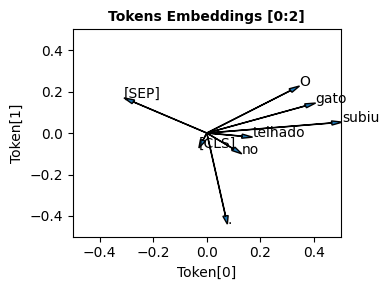

In [77]:
embeddings_2d = hidden_state[0, :, :2].numpy()

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('ORIGINAL EMBEDDING... representação vetorial, duas primeiras dimensões')
print(Fore.BLACK + Style.RESET_ALL)

plt.figure(figsize=(4, 3))

for i, token in enumerate(tokens):
    token_decoded = tokenizer.decode([token])
    x, y = embeddings_2d[i]
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.04, length_includes_head=True)
    plt.text(x, y, token_decoded)

plt.xlabel('Token[0]')
plt.ylabel('Token[1]')
plt.title('Tokens Embeddings [0:2]',fontsize=10,weight='bold')
plt.xlim(-.5, .5)
plt.ylim(-.5, .5)

plt.tight_layout()
plt.show()


**Figura 2.** Embeddings, ou representação vetorial dos tokens, em um espaço de alta dimensão. Aqui, representadas apenas as primeiras duas dimensões, já que os modelos empregam vetores de centenas de entradas (nos exemplos, o BERTimbau, 1024 e o RoBERTa, 768).


neuralmind/bert-large-portuguese-cased
ORIGINAL EMBEDDING... representação vetorial em 2 componentes principais (PCA)



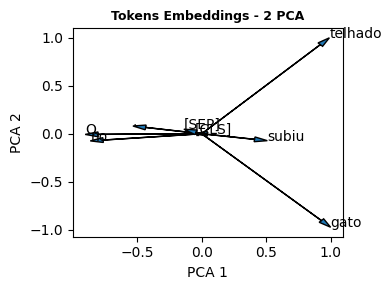

In [47]:
from sklearn.decomposition import PCA

# 2 componentes principais
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(hidden_state[0].numpy())

embeddings_pca[:,0] = embeddings_pca[:,0] / embeddings_pca[:,0].max()
embeddings_pca[:,1] = embeddings_pca[:,1] / embeddings_pca[:,1].max()

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('ORIGINAL EMBEDDING... representação vetorial em 2 componentes principais (PCA)')
print(Fore.BLACK + Style.RESET_ALL)

plt.figure(figsize=(4, 3))

for i, token in enumerate(tokens):
    token_decoded = tokenizer.decode([token])
    x, y = embeddings_2d[i]
    plt.arrow(0, 0, embeddings_pca[i, 0], embeddings_pca[i, 1], head_width=0.05, head_length=0.1, length_includes_head=True)
    plt.annotate(token_decoded, (embeddings_pca[i, 0], embeddings_pca[i, 1]))
    # plt.text(x, y, token_decoded)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Tokens Embeddings - 2 PCA',fontsize=9,weight='bold')
# plt.xlim(-.5, .5)
# plt.ylim(-.5, .5)

plt.tight_layout()
plt.show()

# Attention

O passo seguinte na arquitetura transformers é criar um novo embedding dos tokens, que leve em consideração os demais tokens que participam da texto ponderada pela dependência de um token com relação ao outro. Em outros termos $ E_{gato}[i+1] = \sum_{t = \text{all tokens}} A{_{t}}[i]E{_{t}}[i]$, onde $E_t$ representam sucessivos embeddings e $A_t$ e o vetor de atenção  de cada token. Diferentemente do embedding *inicial*, o mesmo para a palavra gato tanto na frase "O gato subiu no telhado" como na frase "O gato é preto", esse novo embedding será diferente para cada diferente contexto em que o mesmo termo aparecer, pois carrega com ele todos os termos da sequência e a relação entre eles, sendo esse o grande diferencial e poder dessa arquitetura.

**Atenção.** O mecanismo de atenção permite ao modelo focar em diferentes partes da entrada ao processar cada token e, assim, modelar (capturar) melhor as   dependências longas entre os tokens de uma sequência.
Considere a frase "O gato subiu no telhado", é de se esperar que o "O" tenha uma associação maior com "gato" do que qualquer outra palavra, assim como "telhado", deve estar mais relacionado ao verbo "subiu" do que quaiser outros termos. Esses pesos (da associação entre as palavras) são aprendidos pelo modelo durante o treinamento. O vetor de atenção é então utilizado para poderar uma nova representação (embedding) dos tokens.

> **Exemplo**. A seguir os pesos de atenção gerados para cada token na frase "O gato subiu no telhado" com o modelo BERTimbau, já empregado antes. Ver  figuras 3 e 4 para uma apresentação gráfica desses resultados.

In [78]:
print()
print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('VETORES DE ATENÇÃO...')
print(Fore.BLACK + Style.RESET_ALL)

print()
# print(attentions[0][0, 0])
df = pd.DataFrame(attentions[0][0, 0].detach().numpy())
df.index = tokenizer.convert_ids_to_tokens(tokens)
df.columns = tokenizer.convert_ids_to_tokens(tokens)

df = df.round(2)
print(df)
print()
print('*valores arredondados para 2 casas decimais')



neuralmind/bert-large-portuguese-cased
VETORES DE ATENÇÃO...


         [CLS]     O  gato  subiu    no  telhado     .  [SEP]
[CLS]     0.09  0.07  0.09   0.06  0.08     0.07  0.12   0.42
O         0.08  0.36  0.07   0.04  0.05     0.04  0.05   0.31
gato      0.19  0.01  0.59   0.03  0.01     0.01  0.01   0.15
subiu     0.05  0.02  0.04   0.59  0.01     0.06  0.02   0.21
no        0.08  0.10  0.07   0.08  0.15     0.05  0.08   0.39
telhado   0.10  0.02  0.08   0.11  0.02     0.49  0.03   0.16
.         0.03  0.04  0.04   0.02  0.04     0.02  0.26   0.54
[SEP]     0.02  0.00  0.01   0.00  0.00     0.00  0.01   0.96

*valores arredondados para 2 casas decimais


In [95]:
# Exclui os tokens especiais
colunas_excluir = ['[CLS]', '[SEP]']
indices_excluir = ['[CLS]', '[SEP]']

df = df.drop(columns=colunas_excluir, index=indices_excluir)

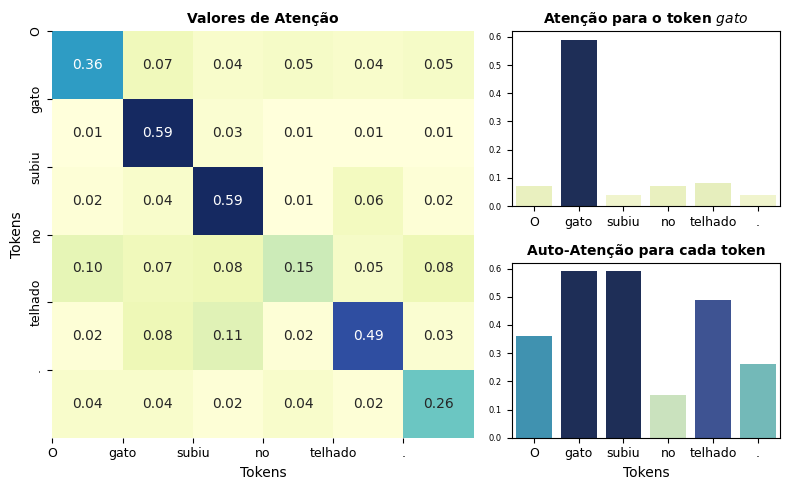

In [96]:
fig = plt.figure(figsize=(8, 5))

ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3, rowspan=2)
# sns.heatmap(df, cmap="Greys", annot=True, fmt=".2f", cbar=False, ax=ax1, alpha=0.8)
sns.heatmap(df, cmap="YlGnBu", annot=True, fmt=".2f", cbar=False, ax=ax1, alpha=0.95)
ax1.set_title("Valores de Atenção",fontsize=10,weight='bold')
ax1.set_xticks(ticks=np.arange(0,len(df)),labels=df.columns,fontsize=9)
ax1.set_yticks(ticks=np.arange(0,len(df)),labels=df.columns,fontsize=9)
ax1.set_xlabel("Tokens")
ax1.set_ylabel("Tokens")

ax2 = plt.subplot2grid((2, 5), (0, 3), colspan=3)
cores_gato = plt.cm.YlGnBu(df['gato'] / df['gato'].max())
# cores_gato = plt.cm.Greys(df['gato'] / df['gato'].max())
sns.barplot(x=df.columns, y=df['gato'], ax=ax2, hue=df.columns, palette=list(cores_gato), legend=False, alpha=0.95)
ax2.set_title("Atenção para o token $gato$",fontsize=10,weight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', labelsize=9)
ax2.tick_params(axis='y', labelsize=6)

ax3 = plt.subplot2grid((2, 5), (1, 3), colspan=3)
cores_diag = plt.cm.YlGnBu(np.diag(df) / np.diag(df).max())
# cores_diag = plt.cm.Greys(np.diag(df) / np.diag(df).max())
sns.barplot(x=df.columns, y=np.diag(df), ax=ax3, hue=df.columns, palette=list(cores_diag), legend=False, alpha=0.95)
ax3.set_title("Auto-Atenção para cada token",fontsize=10,weight='bold')
ax3.set_xlabel("Tokens")
ax3.set_ylabel('')
ax3.tick_params(axis='x', labelsize=9)
ax3.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()


**Figura 3.** Pesos de atenção gerados para cada token na frase "O gato subiu no telhado" com o modelo BERTimbau (esquerda). À direita acima, apenas os valores do vetor para o token "gato", e os valores de auto-atenção, abaixo. Note o maior valor em ordem para gato (o sujeito), subiu (o verbo ou ação) e telhado (advérbio), seguido dos demais tokens com menores valores.

<img src="https://github.com/Rogerio-mack/LLM/blob/main/figs/Attention.png?raw=true" width=800, align="right">

**Figura 4.** Pesos de atenção gerados para o token "gato" na frase "O gato subiu no telhado" com o modelo BERTimbau. Os pesos, refletindo a dependência entre os diferentes pares de tokens com "gato". Vetores de cada token como esse são empregados para criar novos embeddings dos tokens incorporando informações de todos os tokens da sequência e suas dependências.

# Final Embedding

**Final Embedding.** Cada token agora terá uma nova representação vetorial que incorpora as informações de todos os tokens da sequência e suas dependências. Isso cria uma representação de cada token que é adaptativa, isto é, é alterada de acordo com o contexto em que o token aparece.

> **Exemplo**. A seguir a representação final dos tokens para o nosso exemplo com a frase "O gato subiu no telhado." e o modelo BERTimbau. Esse processo pode envolver diversas camadas de processamento. BERTimbau, por exemplo, emprega `"num_hidden_layers": 24` e `"num_attention_heads": 16` (unidade de processamento paralelo), mas para os nossos propósitos basta entender que ao final uma representação, com as importantes características citadas antes, é produzida.

In [102]:
# Extrai as representações da camada oculta
hidden_state = hidden_states[-1] # last
# hidden_state = hidden_states[0] # first

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('FINAL EMBEDDING...')
print(Fore.BLACK + Style.RESET_ALL)

# Mostra as representações para cada token
print(f'Shape: {hidden_state.shape}\n')
for i, token in enumerate(tokens):
    token_decoded = tokenizer.decode([token])
    token_representation = hidden_state[0, i, :].numpy()
    print(f'Token: {token_decoded} \t Embedding: {token_representation[:5]}...')

print()
print('*apenas os 5 primeiros valores de cada vetor é exibido')


neuralmind/bert-large-portuguese-cased
FINAL EMBEDDING...

Shape: torch.Size([1, 8, 1024])

Token: [CLS] 	 Embedding: [ 0.14474559 -0.3951678  -0.27208263 -0.22588223 -0.1557024 ]...
Token: O 	 Embedding: [ 0.56511384  0.5572389  -0.13857746  0.15794633 -0.57514447]...
Token: gato 	 Embedding: [ 0.91120267  0.52934206  0.01050818 -0.42298293  0.8343992 ]...
Token: subiu 	 Embedding: [ 0.6923833   0.84159845 -0.23504539  0.08519047 -0.07571448]...
Token: no 	 Embedding: [ 0.51889616  0.42851102 -0.16189659  0.47935504 -0.7100443 ]...
Token: telhado 	 Embedding: [ 0.46867967  0.87590927 -0.5351022  -0.37858167  0.784427  ]...
Token: . 	 Embedding: [ 0.36821663  0.7553065  -0.34035742  0.40753618  0.10208642]...
Token: [SEP] 	 Embedding: [ 0.9630483   0.50642955 -0.6537497   0.01687692 -0.11627071]...

*apenas os 5 primeiros valores de cada vetor é exibido


# Predict, `mask`

Suponha agora que nossa frase não está completa, "O gato subiu no [MASK]." onde [MASK] representa o próxima palavra (token) que desejamos prever. Podemos empregar o mesmo modelo e representação que usamos até agora para buscar os tokens que apresentam maior probabilidade de ocuparem o lugar de [MASK] no texto.  

> **Exemplo**. A seguir os resultados do modelo BERTimbau para predição da *próxima palavra* na frase "O gato subiu no ?". Para isso o BERT emprega um token especial, [MASK]. Esse token não está presente em todos os modelos (nem todos modelos estão construídos para executar essa tarefa) ou ainda podem aparecer de modo diferente, como por exemplo <mask> no modelo RoBERTa.

In [109]:
from transformers import pipeline

pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)

result = pipe('O gato subiu no [MASK].') # Bert, Twitter
# result = pipe('O gato subiu no <mask>.') # Roberta

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('Predict next word...')
print(Fore.BLACK + Style.RESET_ALL)

print(pd.DataFrame(result))

print(Fore.GREEN + Style.BRIGHT)
print(pd.DataFrame(result).head(1))


neuralmind/bert-large-portuguese-cased
Predict next word...

   score  token token_str                  sequence
0   0.36  16267   telhado  O gato subiu no telhado.
1   0.08   8105      chão     O gato subiu no chão.
2   0.07   3883     carro    O gato subiu no carro.
3   0.03  16909      muro     O gato subiu no muro.
4   0.03   5340     palco    O gato subiu no palco.

   score  token token_str                  sequence
0   0.36  16267   telhado  O gato subiu no telhado.


Não obstante as inúmeras simplificações (não tratamos, dentre outros, aspectos mais detalhados das camadas, paralelismo, funções de ativação, tamanho das sequências ou normalizações), as introdução desses conceitos de forma prática permite entendermos e avaliarmos melhor o uso de grandes modelos de linguagem em nossa aplicação, e o código para o obter todos os resultados apresentados aqui com o modelo BERTimbau, pode ser encontrado no nosso repositório no GitHub, incluindo ainda os modelos RoBERTa e TwHIN-BERT (Zhang et al., 2022).

## Text-Generation

In [112]:
# Change BERT model, it doesn't support text-generation
# pipe = pipeline('text-generation', model=model, tokenizer=tokenizer, max_length=100, truncation=True)

# result = pipe('O gato subiu no')[0]['generated_text']
# print(result)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


O gato subiu no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) séc ( ( ( ( ( ( ( ( ( ( (


# *b. Arquiteturas transformers e tarefas*

Os transformers surgiram como uma arquitetura ou *encode-decode* (Vaswani et al., 2017). Hoje, grandes modelos de linguagem podem ser divididos em três categorias conforme o uso de camadas transformers, *encode*, *decode* ou *encode-decode*, cada um tendo suas vantagens e desvantagens na execução de diferentes tarefas. Após serem treinados os modelos podem ser adaptados para uma série de tarefas que incluem em processamento de linguagem natural:

1. Classificação de textos (tópicos, análise de sentimento)
2. Perguntas-Respostas
3. Geração de Texto
4. Tradução
5. Sumarização
6. Diálogos, etc.

*nota: transformers também podem ser empregados para outros domínios além de linguagem natural embora, aqui, nosso foco é restrito a esse domínio.






# *c. Fine-Tuning*



# *d. Modelos em Saúde e Aplicações*

# Usando GPT2

Note este não é multilingue, portanto trata-se aqui apenas de um exercício mostrando os mesmos passos que apresentamos acima. Substitua por uma frase em inglês para ter melhores resultados.

In [119]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config

# Configuração do modelo GPT-2 pequeno
config = GPT2Config(
    vocab_size=50257,
    n_positions=512,
    n_ctx=512,
    n_embd=128,
    n_layer=16,
    n_head=16
)

model_name = 'gpt2'

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel(config)

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print(Fore.BLACK + Style.RESET_ALL)
print(model.config)



gpt2

GPT2Config {
  "activation_function": "gelu_new",
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 512,
  "n_embd": 128,
  "n_head": 16,
  "n_inner": null,
  "n_layer": 16,
  "n_positions": 512,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "transformers_version": "4.42.4",
  "use_cache": true,
  "vocab_size": 50257
}



## GPT-2 Tokens

In [120]:
# Frase de exemplo em português
text = "O gato subiu no telhado."

inputs = tokenizer(text, return_tensors='pt')

# model.config.num_attention_heads = 2
# model.config.num_hidden_layers = 2

# Exibe tokens
tokens = inputs['input_ids'][0].tolist()

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('TOKENS...')
print(Fore.BLACK + Style.RESET_ALL)

print(f'Frase: \t \t \t {text}')
print(f'Tokens: \t \t {tokens}')
print(f'Tokens decodificados: \t {tokenizer.convert_ids_to_tokens(tokens)}')


gpt2
TOKENS...

Frase: 	 	 	 O gato subiu no telhado.
Tokens: 	 	 [46, 308, 5549, 850, 16115, 645, 13632, 71, 4533, 13]
Tokens decodificados: 	 ['O', 'Ġg', 'ato', 'Ġsub', 'iu', 'Ġno', 'Ġtel', 'h', 'ado', '.']


## GPT-2 Original Embedding

In [121]:
# Captura as representações intermediárias
def get_intermediate_representations(model, inputs):
    model_outputs = model(**inputs, output_hidden_states=True, return_dict=True, output_attentions=True)
    hidden_states = model_outputs.hidden_states
    attentions = model_outputs.attentions
    return hidden_states, attentions

# Executa o modelo e capturar as representações intermediárias
with torch.no_grad():
    hidden_states, attentions = get_intermediate_representations(model, inputs)

# Extrai as representações da camada oculta
# hidden_state = hidden_states[-1] # last
hidden_state = hidden_states[0] # first

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('ORIGINAL EMBEDDING')
print(Fore.BLACK + Style.RESET_ALL)

# Mostra as representações para cada token
print(f'Shape: {hidden_state.shape}\n')
for i, token in enumerate(tokens):
    token_decoded = tokenizer.decode([token])
    token_representation = hidden_state[0, i, :].numpy()
    print(f'Token: {token_decoded} \t Embedding: {token_representation[:5]}...')

print()
print('*apenas os 5 primeiros valores de cada vetor é exibido')




gpt2
ORIGINAL EMBEDDING

Shape: torch.Size([1, 10, 128])

Token: O 	 Embedding: [-0.00288201  0.03813163  0.01609125 -0.          0.016142  ]...
Token:  g 	 Embedding: [ 0.00240122 -0.04893607  0.03419996 -0.00805439 -0.00498362]...
Token: ato 	 Embedding: [0.01564061 0.0038025  0.01576114 0.06102049 0.00926405]...
Token:  sub 	 Embedding: [-0.02171179 -0.00948324 -0.0311668  -0.01698327 -0.        ]...
Token: iu 	 Embedding: [ 0.09523561 -0.02011191  0.05649779 -0.04052588 -0.01246443]...
Token:  no 	 Embedding: [ 0.01972869  0.00201203  0.01916147  0.         -0.0542327 ]...
Token:  tel 	 Embedding: [ 0.07048467  0.01889245 -0.00894899  0.03595356  0.01504175]...
Token: h 	 Embedding: [ 0.02013207 -0.00073434 -0.03379986 -0.02553117  0.03618355]...
Token: ado 	 Embedding: [-0.00925182  0.03105847  0.00774357  0.05071235  0.        ]...
Token: . 	 Embedding: [ 0.00346573  0.0215174   0.01127904 -0.00249246  0.0101226 ]...

*apenas os 5 primeiros valores de cada vetor é exibido


## GPT-2 Attention

In [122]:
print()
print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('VETORES DE ATENÇÃO...')
print(Fore.BLACK + Style.RESET_ALL)

print()
# print(attentions[0][0, 0])
df = pd.DataFrame(attentions[0][0, 0].detach().numpy())
df.index = tokenizer.convert_ids_to_tokens(tokens)
df.columns = tokenizer.convert_ids_to_tokens(tokens)

df = df.round(2)
print(df)
print()
print('*valores arredondados para 2 casas decimais')



gpt2
VETORES DE ATENÇÃO...


         O    Ġg   ato  Ġsub    iu   Ġno  Ġtel     h   ado     .
O     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
Ġg    0.56  0.55  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
ato   0.37  0.39  0.35  0.00  0.00  0.00  0.00  0.00  0.00  0.00
Ġsub  0.28  0.28  0.28  0.27  0.00  0.00  0.00  0.00  0.00  0.00
iu    0.22  0.22  0.23  0.22  0.00  0.00  0.00  0.00  0.00  0.00
Ġno   0.19  0.19  0.18  0.18  0.18  0.18  0.00  0.00  0.00  0.00
Ġtel  0.16  0.16  0.16  0.16  0.15  0.16  0.16  0.00  0.00  0.00
h     0.14  0.14  0.14  0.00  0.14  0.14  0.13  0.15  0.00  0.00
ado   0.12  0.13  0.12  0.00  0.13  0.00  0.12  0.12  0.12  0.00
.     0.11  0.11  0.11  0.11  0.11  0.11  0.12  0.11  0.11  0.11

*valores arredondados para 2 casas decimais


## GPT-2 Final Embedding

In [123]:
# Extrai as representações da camada oculta
hidden_state = hidden_states[-1] # last
# hidden_state = hidden_states[0] # first

print()
print(Fore.GREEN + Style.BRIGHT + model_name)
print('FINAL EMBEDDING...')
print(Fore.BLACK + Style.RESET_ALL)

# Mostra as representações para cada token
print(f'Shape: {hidden_state.shape}\n')
for i, token in enumerate(tokens):
    token_decoded = tokenizer.decode([token])
    token_representation = hidden_state[0, i, :].numpy()
    print(f'Token: {token_decoded} \t Embedding: {token_representation[:5]}...')

print()
print('*apenas os 5 primeiros valores de cada vetor é exibido')


gpt2
FINAL EMBEDDING...

Shape: torch.Size([1, 10, 128])

Token: O 	 Embedding: [-0.74649423  0.87751365 -1.5395728   0.3374034  -1.7767113 ]...
Token:  g 	 Embedding: [-1.2120851  -1.1629217   1.114416   -1.8773952  -0.39135736]...
Token: ato 	 Embedding: [-1.8072127   0.90978265  1.4470011   0.57110083 -0.10881299]...
Token:  sub 	 Embedding: [-3.2954347  -1.2021898  -0.97724086 -1.7531801   1.3740584 ]...
Token: iu 	 Embedding: [ 1.0421716  -1.2877972   1.9315314  -0.21268538 -0.8686753 ]...
Token:  no 	 Embedding: [-0.39365065 -0.12563007  2.2098813   0.16241606 -1.3939607 ]...
Token:  tel 	 Embedding: [1.8690989  0.35462317 0.5761661  1.2668507  0.34394512]...
Token: h 	 Embedding: [ 0.50985706 -0.28916782 -0.13188894 -0.3876659   0.72824955]...
Token: ado 	 Embedding: [-0.10425857 -0.2309089   1.0516719   1.2145306  -0.5244941 ]...
Token: . 	 Embedding: [-0.18544726  0.12877207  0.08634337 -0.15907896 -0.63802814]...

*apenas os 5 primeiros valores de cada vetor é exibido


## GPT-2 Text-Generation

In [126]:
# Change BERT model, it doesn't support text-generation
pipe = pipeline('text-generation', model=model, tokenizer=tokenizer, max_length=100, truncation=True)

result = pipe('O gato subiu no')[0]['generated_text']
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


O gato subiu no no no no no no boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundaries boundarieskeleykeleykeleykeleykeleykeleykeleykeleykeleykeleykeleykeleykeleykeleymaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmaresmares
